STAT 451: Machine Learning (Fall 2020)  
Instructor: Sebastian Raschka (sraschka@wisc.edu)  

Course website: http://pages.stat.wisc.edu/~sraschka/teaching/stat451-fs2020/

# L09: Model Evaluation 2 -- Confidence Intervals and Resampling

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p numpy,mlxtend,matplotlib,sklearn

Sebastian Raschka 
last updated: 2020-11-11 

CPython 3.8.2
IPython 7.18.1

numpy 1.18.5
mlxtend 0.18.0.dev0
matplotlib 3.3.1
sklearn 0.23.2


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# 1. Iris Feature by Class Distribution in Random Subsampling

### (Just for your reference to see that we used real data)

The following code will randomly divide the iris dataset into a 100-example training and 50-example test dataset to illustrate the issues that occur in non-stratified subsampling. I.e., the proportion of class labels in the training set will differ from the original dataset. Even worse, the proportion of class labels in the test set will be different too, depending on what the class label proportion is in the training set.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison

X, y = iris_data()

X, y = shuffle_arrays_unison([X, y], random_seed=123)
X_train, X_test = X[:100], X[100:150]
y_train, y_test = y[:100], y[100:150]

In [4]:
np.bincount(y)

array([50, 50, 50])

In [5]:
np.bincount(y_train)

array([38, 28, 34])

In [6]:
np.bincount(y_test)

array([12, 22, 16])

In [7]:
df = pd.DataFrame(X)
df['class'] = y

df_train = pd.DataFrame(X_train)
df_train['class'] = y_train

df_test = pd.DataFrame(X_test)
df_test['class'] = y_test

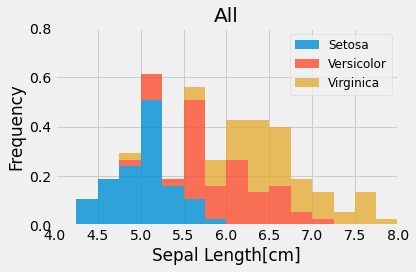

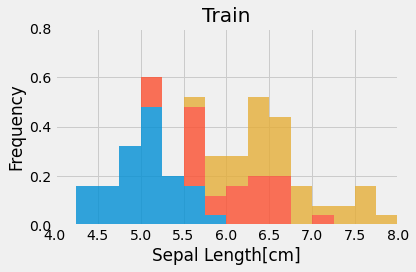

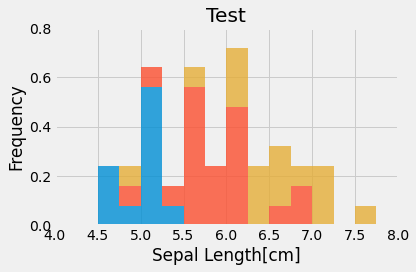

In [8]:
def stackhist(x, y, **kws):
    grouped = x.groupby(y)
    data = [d for _, d in grouped]
    labels = [l for l, _ in grouped]
    plt.hist(data, 
             histtype="barstacked", 
             label=labels, 
             alpha=0.8, 
             density=True,
             bins=np.arange(4.0, 8.1, 0.25))
    plt.ylim([0, 0.8])
    plt.xlim([4, 8])
    plt.xlabel('Sepal Length[cm]')
    plt.ylabel('Frequency')
    

with plt.style.context('fivethirtyeight'):    

    stackhist(df[0], df['class'])
    plt.legend(['Setosa', 'Versicolor', 'Virginica'], fontsize=12)
    plt.title('All')
    plt.tight_layout()
    #plt.savefig('./all.svg')
    plt.show()    

    stackhist(df_train[0], df_train['class'])
    plt.title('Train')
    plt.tight_layout()
    #plt.savefig('./train.svg')
    plt.show()    

    stackhist(df_test[0], df_test['class'])
    plt.title('Test')
    plt.tight_layout()
    #plt.savefig('./test.svg')
    plt.show() 
    

Note that these problems can be mitigated by using the `stratify` parameter in scikit-learn's [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function.